In [54]:
import copy

import numpy as np
import skimage
from colormath.color_conversions import convert_color
from colormath.color_objects import sRGBColor, LCHuvColor
from matplotlib import pyplot as plt
from matplotlib import colormaps as cms

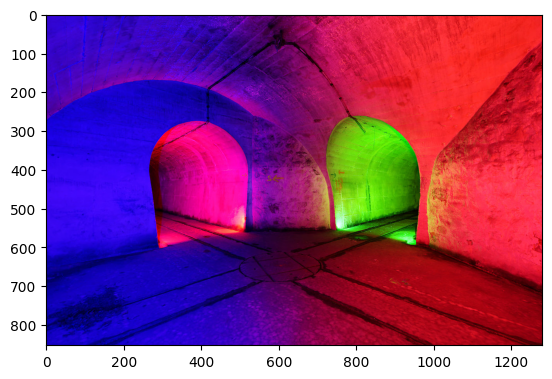

In [55]:
image = skimage.io.imread('../resources/basement.png')
plt.imshow(image)

In [93]:
def rgb_to_l(pixel):
    rgb = sRGBColor(pixel[0], pixel[1], pixel[2], is_upscaled=True)
    lch = convert_color(rgb, LCHuvColor)
    l = int(lch.lch_l * 256 / 100)
    return [l, l, l, pixel[3]]

l_image = [[rgb_to_l(pixel) for pixel in row] for row in image]

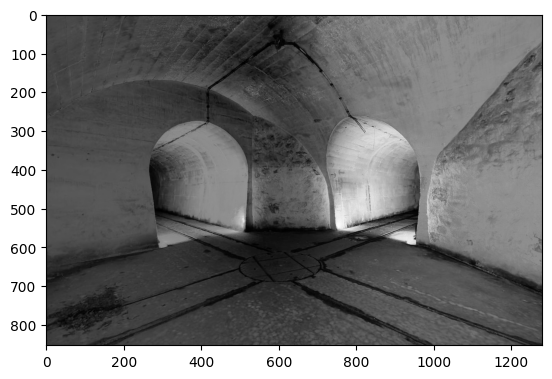

In [94]:
colormap = cms["Grays"].reversed()
plt.imshow(l_image, cmap=colormap, vmin=0, vmax=255)

In [108]:
def halftone(l_image):
    height = len(l_image)
    width = len(l_image[0])
    diffused_error = [[0 for _ in range(width)] for _ in range(height)]
    result = [[[0, 0, 0, 255] for _ in range(width)] for _ in range(height)]
    
    for i in range(width):
        for j in range(height):
            actual_l = l_image[j][i][0]
            corrected_l = actual_l + diffused_error[j][i]
            quantized_l = 0 if corrected_l <= 127 else 255
            error = corrected_l - quantized_l
            
            if i + 1 < width:
                diffused_error[j][i + 1] += error / 2
            if j + 1 < height:
                diffused_error[j + 1][i] += error / 2
                
            result[j][i] = [quantized_l, quantized_l, quantized_l, 255]
            
    return result
            
halftoned_image = halftone(l_image)

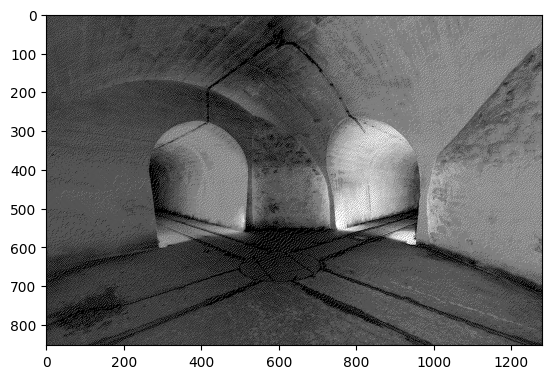

In [103]:
colormap = cms["Grays"].reversed()
plt.imshow(halftoned_image, cmap=colormap, vmin=0, vmax=255)

In [107]:
import numpy

skimage.io.imsave("../resources/basement_bw.png", numpy.asarray(halftoned_image, dtype=numpy.uint8))